In [10]:
import numpy as np

In [11]:
def generate_linear(n: int = 100):
    """
    Generate data points which are linearly separable
    :param n: number of points
    :return: inputs and labels
    """
    pts = np.random.uniform(0, 1, (n, 2))
    inputs, labels = [], []

    for pt in pts:
        inputs.append([pt[0], pt[1]])
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)

    return np.array(inputs), np.array(labels).reshape(n, 1)

In [12]:
def generate_xor_easy(n: int = 11):
    """
    Generate data points based on XOR situation
    """
    inputs, labels = [], []

    for i in range(n):
        inputs.append([0.1 * i, 0.1 * i])
        labels.append(0)

        if 0.1 * i == 0.5:
            continue

        inputs.append([0.1 * i, 1 - 0.1 * i])
        labels.append(1)

    return np.array(inputs), np.array(labels).reshape(21, 1)

In [13]:
# x_train for training data, y_train for labels
np.random.seed(7)
# x_train, y_train = generate_linear(n = 100) 
x_train, y_train = generate_xor_easy()

In [14]:
class deepNeuralNetworks():
    def __init__(self):
        """
        Initialize params
        """
        self.sizeOfInput = 2
        self.sizeOfHid1 = 6
        self.sizeOfHid2 = 6
        self.sizeOfOutput = 1
        self.lR = 0.05
        self.loss = []
        """
        Sets weights
        """
        self.W1 = np.random.randn(self.sizeOfInput, self.sizeOfHid1)
        self.W2 = np.random.randn(self.sizeOfHid1, self.sizeOfHid2)
        self.W3 = np.random.randn(self.sizeOfHid2, self.sizeOfOutput)
    
    """
    Sigmoid func
    """
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def derivative_sigmoid(self, x):
        return np.multiply(x, (1 - x))

    """
    ReLU function
    """
    def ReLU(self, x):
        return np.maximun(0, x)

    def derivative_ReLU(self, x):
        return np.where(x > 0, 1, 0)

    """
    Mean squared error 
    """
    def MSELoss(self, yHat, y):
        return np.mean((yHat - y) ** 2)

    """
    Forward pass
    """
    def forward(self, inputData):
        self.H1 = np.dot(inputData, self.W1)
        self.Z1 = self.sigmoid(self.H1)
        self.H2 = np.dot(self.Z1, self.W2)
        self.Z2 = self.sigmoid(self.H2)
        self.H3 = np.dot(self.Z2, self.W3)
        self.y = self.sigmoid(self.H3)
        return self.y
    
#     def forward_without_activaction(self, inputData):
#         self.T1 = np.dot(inputData, self.W1)
        
#         self.T2 = np.dot(self.T1, self.W2)
        
#         self.T3 = np.dot(self.T2, self.W3)
#         self.y = (self.T3)
#         return self.y
    
    """
    Back propagation
    """
    def backward(self, yPredict):
        temp0 = self.derivative_sigmoid(self.sigmoid(self.H3)) * (yPredict - y_train)
        dW3 = np.dot(self.Z2.T, temp0)
        self.W3 -= 2 * self.lR * dW3
        
        temp1 = np.dot(self.derivative_sigmoid(self.sigmoid(self.H3)) * (yPredict - y_train), self.W3.T)
        temp2 = self.derivative_sigmoid(self.sigmoid(self.H2)) * temp1
        dW2 = np.dot(self.Z1.T, temp2)
        self.W2 -= 2 * self.lR * dW2
        
        temp3 = np.dot(temp2, self.W2.T)
        dW1 = np.dot(x_train.T, temp3)
        self.W1 -= 2 * self.lR * dW1
    
#     def backward_without_activaction(self, yPredict):
#         tempDiff = yPredict - y_train
#         self.W3 -= 2 * self.lR * np.dot(self.T2.T, tempDiff)
        
#         temp2 = np.dot(tempDiff, self.W3.T)
#         self.W2 -= 2 * self.lR * np.dot(self.T1.T, temp2)
        
#         temp1 = np.dot(temp2, self.W2.T)
#         self.W1 -= 2 * self.lR * np.dot(x_train.T, temp1)
        
    """
    Optimizer
    
    def gradientDescent(self, W, dW):
        return W - self.lR * dW
    """
    
    """
    Accuracy
    """
    def accuracy(self, yHat, yPredict):
        return np.sum((yHat == yPredict) / yHat.shape[0]) * 100
    
    """
    Training
    """
    def train(self, epoch = 1500):
        for i in range(epoch):
            output = self.forward(x_train)
            self.backward(output)
            loss = self.MSELoss(y_train, output)
            self.loss.append(loss)
            if (i+1) % 100 == 0:
                print(f'epoch {i:4} loss : {loss:8f}')
    
    """
    Testing
    """
    def test(self, groundTruth):
        testPredict = self.forward(x_train)
        for i in range(groundTruth.shape[0]):
            print(f'Iter{i}| Ground truth: {groundTruth[i][0]}\t| prdiction: {testPredict[i][0]}')
        
        loss = self.MSELoss(y_train, testPredict)
        predictVal = np.round(testPredict)
        acc = self.accuracy(y_train, predictVal)
        print(f'loss = {loss:5f}, accuracy={acc:.2f}%')
#         print(testPredict)
        return predictVal
    
    """
    Show loss
    """
    def showLoss(self, lossVal):
        import matplotlib.pyplot as plt
        plt.xlabel("epoch")
        plt.ylabel("Loss")
        plt.plot(lossVal)

In [15]:
dNN = deepNeuralNetworks()
dNN.train()
result = dNN.test(y_train)

epoch   99 loss : 0.249535
epoch  199 loss : 0.246391
epoch  299 loss : 0.234912
epoch  399 loss : 0.206241
epoch  499 loss : 0.161535
epoch  599 loss : 0.084323
epoch  699 loss : 0.040758
epoch  799 loss : 0.022368
epoch  899 loss : 0.013962
epoch  999 loss : 0.009618
epoch 1099 loss : 0.007113
epoch 1199 loss : 0.005538
epoch 1299 loss : 0.004478
epoch 1399 loss : 0.003728
epoch 1499 loss : 0.003174
Iter0| Ground truth: 0	| prdiction: 0.06602832621391844
Iter1| Ground truth: 1	| prdiction: 0.9753035423923543
Iter2| Ground truth: 0	| prdiction: 0.062424605989001763
Iter3| Ground truth: 1	| prdiction: 0.9741261337434626
Iter4| Ground truth: 0	| prdiction: 0.05907091900123021
Iter5| Ground truth: 1	| prdiction: 0.971712318207693
Iter6| Ground truth: 0	| prdiction: 0.05598772962857082
Iter7| Ground truth: 1	| prdiction: 0.963181882203731
Iter8| Ground truth: 0	| prdiction: 0.053183739830698275
Iter9| Ground truth: 1	| prdiction: 0.8717696232146741
Iter10| Ground truth: 0	| prdiction: 0.0

In [16]:
def show_result(x, y, pred_y):
    import matplotlib.pyplot as plt
    plt.subplot(1,2,1)
    plt.title('Ground truth', fontsize=18)
    for i in range(x.shape[0]): # x.shape = (100, 2)
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
            
    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
            
    plt.show()

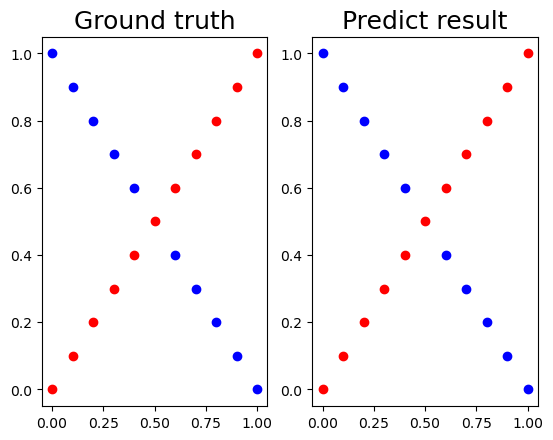

In [17]:
show_result(x_train, y_train, result)

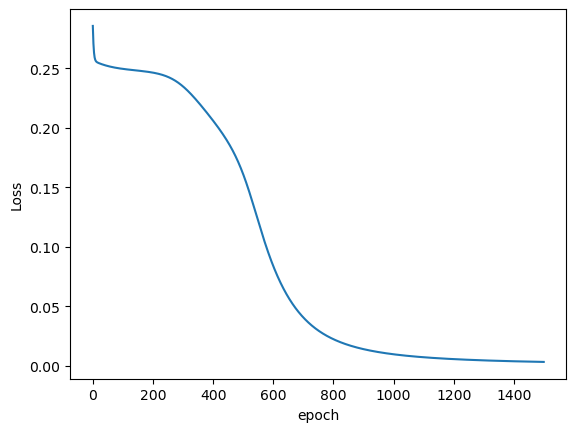

In [18]:
dNN.showLoss(dNN.loss)